In [1]:
import opendatasets as od

In [2]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [3]:
import os

In [4]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [5]:
import pandas as pd

In [6]:
survey_raw_d = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [7]:
survey_raw_d.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [8]:
survey_raw_d.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [9]:
survey_raw_d.shape

(64461, 61)

In [10]:
schema_fname = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_schema.csv', index_col='Column').QuestionText

In [11]:
schema_fname['MainBranch']

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

In [12]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [13]:
survey_df = survey_raw_d[selected_columns].copy()

In [14]:
survey_df.shape

(64461, 20)

In [15]:
schema_df = schema_fname[selected_columns].copy()

In [16]:
schema_df

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [17]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [18]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [19]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [20]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [21]:
survey_df.drop(survey_df[survey_df.Age < 10].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age >100].index, inplace=True)

In [22]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45436.000000,57467.000000,56776.000000,44128.000000,41147.000000
mean,30.834294,15.476273,12.783130,8.870354,40.782153
std,9.506982,5.113997,9.490771,7.760095,17.816102
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,99.000000,85.000000,50.000000,50.000000,475.000000


In [23]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [24]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [25]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object')

In [26]:
import numpy as np
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [27]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)


In [28]:
survey_df.Gender.value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [29]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
18325,Canada,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,17.0,12.0,8.0,HTML/CSS;JavaScript;PHP,HTML/CSS;JavaScript;PHP,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, full-stack",50.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Often: 1-2 days per week or more,Very important
26413,United States,48.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A social science (such as anthropology, psycho...",Yes,9.0,18.0,NaN,Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...,Go;Rust,Every few months,Call a coworker or friend;Visit Stack Overflow...,"Not employed, but looking for work","Developer, full-stack;System administrator",NaN,NaN,NaN,NaN,Fairly important
29299,India,21.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,4.0,NaN,C#;HTML/CSS;Java;JavaScript;Python;SQL,Go;HTML/CSS;Java;JavaScript;Kotlin;Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Developer, front-...",35.0,Very satisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Fairly important
3454,United States,36.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,No,19.0,6.0,3.0,C#;SQL,C#;HTML/CSS;JavaScript;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, desktop or enterprise applications;...",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
56069,Germany,36.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,16.0,10.0,2.0,Java;Julia;Kotlin;SQL,Java;Julia;Kotlin;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",39.0,Slightly dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Critically important
24291,Russian Federation,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,9.0,2.0,Java;Python;Swift,C++;Go;Java;Kotlin;Python;Swift,Once a year,Meditate;Visit Stack Overflow;Go for a walk or...,Employed part-time,"Developer, desktop or enterprise applications;...",32.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
24488,Belgium,17.0,Man,Primary/elementary school,NaN,Yes,9.0,7.0,NaN,C++,C++,Once a year,Visit Stack Overflow;Do other work and come ba...,Student,NaN,NaN,NaN,NaN,NaN,NaN
22271,India,21.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,15.0,NaN,NaN,HTML/CSS;JavaScript,HTML/CSS;JavaScript;PHP;Python;Ruby;Rust;SQL;T...,Once a year,Visit Stack Overflow;Watch help / tutorial videos,"Not employed, but looking for work",NaN,NaN,NaN,Industry that I’d be working in;How widely use...,NaN,NaN
23357,Austria,26.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,15.0,12.0,6.0,Bash/Shell/PowerShell;Haskell;Java;Kotlin;Scala,Bash/Shell/PowerShell;Go;Haskell;Java;Scala,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"DevOps specialist;Engineer, site reliability;S...",38.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Very important
21700,Hong Kong (S.A.R.),NaN,Man,Some college/university study without earning ...,I never declared a major,Yes,5.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [31]:
schema_df.head()

Column
Country                                          Where do you live?
Age               What is your age (in years)? If you prefer not...
Gender            Which of the following describe you, if any? P...
EdLevel           Which of the following best describes the high...
UndergradMajor                What was your primary field of study?
Name: QuestionText, dtype: object

In [32]:
schema_df.Country

'Where do you live?'

In [33]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [34]:
highest_country = survey_df.Country.value_counts().head(15)

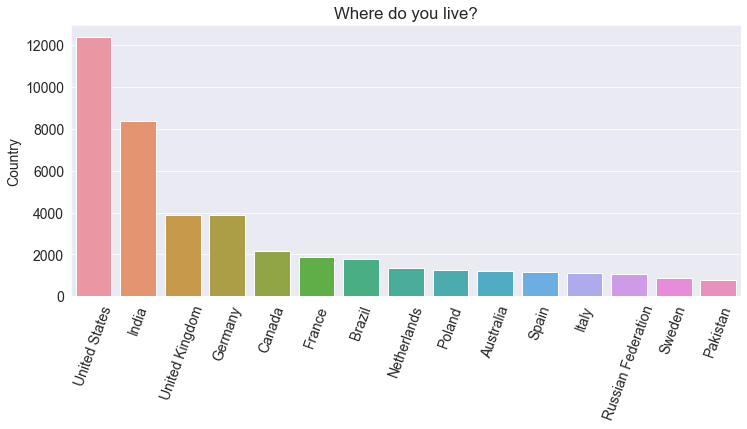

In [35]:
plt.figure(figsize=(12,5))
plt.xticks(rotation = 70)
plt.title(schema_df.Country)
sns.barplot(x=highest_country.index, y=highest_country);

In [36]:
country_languages = pd.read_csv('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/countries-languages-spoken/countries-languages.csv')

In [37]:
country_languages.head()

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"Catalán (official), French, Castilian, Portuguese"
4,Angola,"Portuguese (official), Bantu and other African..."


In [38]:
language_survey = survey_df.merge(country_languages, on='Country')

In [39]:
survey_df.shape

(64306, 20)

In [40]:
language_survey.shape

(61484, 21)

In [41]:
language_survey.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,Languages Spoken
32104,France,23.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,12.0,11.0,2.0,HTML/CSS;JavaScript;PHP;TypeScript,...,Every few months,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",35.0,Slightly dissatisfied,"Industry that I’d be working in;Languages, fra...",Occasionally: 1-2 days per quarter but less th...,Fairly important,"French 100%, rapidly declining regional dialec..."
50650,Turkey,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,22.0,5.0,4.0,C++,...,Once a year,Visit Stack Overflow,Employed full-time,"Academic researcher;Developer, desktop or ente...",40.0,Slightly dissatisfied,Office environment or company culture;Opportun...,Sometimes: 1-2 days per month but less than we...,Fairly important,"Turkish (official), Kurdish, Dimli, Azeri, Kab..."
25299,India,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Swift,...,Once a decade,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir..."
36686,Ukraine,21.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,3.0,2.0,HTML/CSS;JavaScript;PHP;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, front-end;Devel...",20.0,Slightly satisfied,Remote work options;Office environment or comp...,Never,Not at all important/not necessary,"Ukrainian 67%, Russian 24%, Romanian, Polish, ..."
45723,Serbia,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Yes,18.0,3.0,1.0,C#;JavaScript;SQL,...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed part-time,"Developer, back-end;Developer, desktop or ente...",40.0,Slightly satisfied,"Industry that I’d be working in;Languages, fra...",Often: 1-2 days per week or more,Somewhat important,"Serbian (official); Romanian, Hungarian, Slova..."
10883,United States,27.0,Man,"Associate degree (A.A., A.S., etc.)",NaN,Yes,6.0,22.0,10.0,Assembly;Bash/Shell/PowerShell;C++;HTML/CSS;Ja...,...,Every few months,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Not at all important/not necessary,"English 82%, Spanish 11% (2000)"
40692,Mexico,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,10.0,4.0,C#;HTML/CSS;JavaScript;SQL,...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, full-stack;E...",48.0,Neither satisfied nor dissatisfied,Industry that I’d be working in;How widely use...,Sometimes: 1-2 days per month but less than we...,Fairly important,"Spanish, various Mayan, Nahuatl, and other reg..."
27691,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,4.0,NaN,C;C#;Java;PHP;SQL,...,NaN,Call a coworker or friend,Employed full-time,"Academic researcher;Developer, back-end;Develo...",NaN,NaN,NaN,NaN,NaN,"Hindi 30%, English, Bengali, Gujarati, Kashmir..."
36405,China,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,"Standard Chinese (Mandarin/Putonghua), Yue (Ca..."
13662,United States,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,11.0,14.0,9.0,Bash/Shell/PowerShell;C#;Python;SQL;TypeScript,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed ful

In [42]:
language_survey.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'Languages Spoken'],
      dtype='object')

In [43]:
 English_speaking_df = language_survey.where((language_survey['Languages Spoken'].str.contains('English',na=False)), np.nan)

In [44]:
English_speaking_df.Country.count()

38645

In [45]:
non_Eng_speaking_df = language_survey.where(~(language_survey['Languages Spoken'].str.contains('English',na=False)), np.nan)

In [46]:
non_Eng_speaking_df.Country.count()

22839

In [47]:
language_survey.Country.count()

61484

In [48]:
percen_english_speak = (English_speaking_df.Country.count() / language_survey.Country.count()) * 100

In [49]:
print('Total percentage of English speaking Coutries from survey is {}%.'.format(round(percen_english_speak)))

Total percentage of English speaking Coutries from survey is 63%.


In [50]:
percen_non_english_speak = (non_Eng_speaking_df.Country.count() / language_survey.Country.count()) * 100

In [51]:
print('Total percentage of non English speaking Coutries from survey is {}%.'.format(round(percen_non_english_speak)))

Total percentage of non English speaking Coutries from survey is 37%.


In [52]:
survey_df.Age.value_counts()

25.0    2660
28.0    2392
30.0    2391
26.0    2372
27.0    2315
        ... 
15.5       1
96.0       1
35.7       1
21.5       1
22.5       1
Name: Age, Length: 105, dtype: int64

In [53]:
schema_df.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

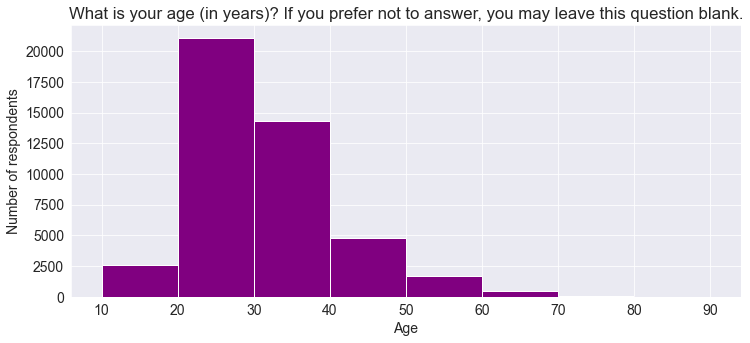

In [54]:
plt.figure(figsize=(12,5))
plt.title(schema_df.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,100,10), color='purple')
plt.show();

In [55]:
bins = [0,10,18,30,45,60,100]
labels = ['less than 10','10-18 years','18-30 years','30-45 years','45-60 years', 'greater than 60']
survey_df['Age_group'] = pd.cut(survey_df.Age, bins, labels= labels)

In [56]:
survey_df[['Age','Age_group']].sample(10)

,Age,Age_group
17635,53.0,45-60 years
162,18.0,10-18 years
46434,32.0,30-45 years
18657,23.0,18-30 years
22508,21.0,18-30 years
51822,24.0,18-30 years
41910,30.0,18-30 years
60483,21.0,18-30 years
23187,30.0,18-30 years
12495,31.0,30-45 years


In [57]:
survey_df.Age_group.value_counts().index

CategoricalIndex(['18-30 years', '30-45 years', '45-60 years', '10-18 years',
                  'greater than 60', 'less than 10'],
                 categories=['less than 10', '10-18 years', '18-30 years', '30-45 years', '45-60 years', 'greater than 60'], ordered=True, dtype='category')

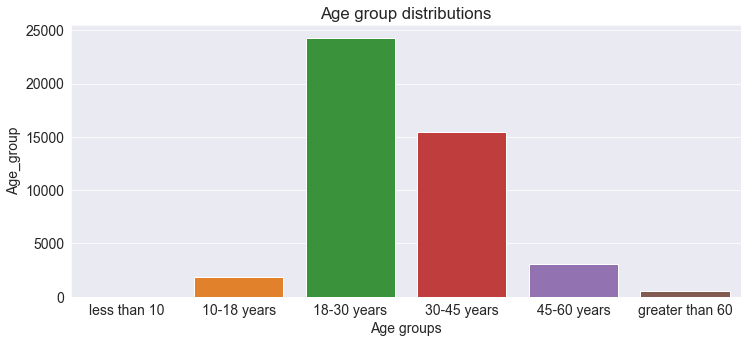

In [58]:
plt.figure(figsize=(12,5))
# plt.xticks(rotation = 70)
plt.title('Age group distributions')
plt.xlabel('Age groups')
plt.ylabel('Number of participants')

sns.barplot(x=survey_df.Age_group.value_counts().index, y=survey_df.Age_group.value_counts())
plt.show();

In [59]:
schema_df.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [60]:
gender_count = survey_df.Gender.value_counts()
gender_count

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

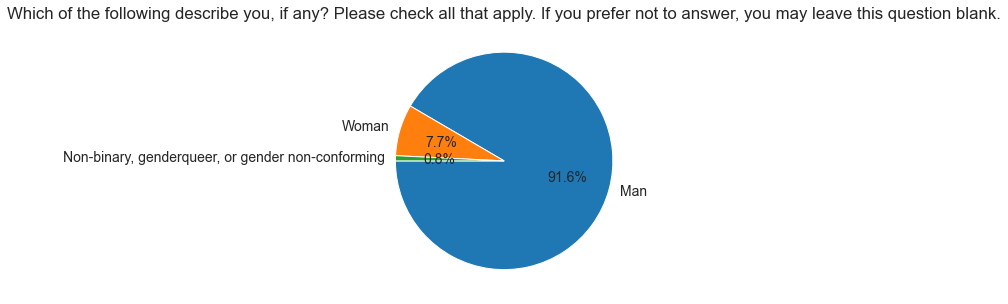

In [69]:
plt.figure(figsize=(12,5))
plt.title(schema_df.Gender)
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=180);
# plt.pie??

In [70]:
schema_df.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [72]:
survey_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: EdLevel, dtype: int64

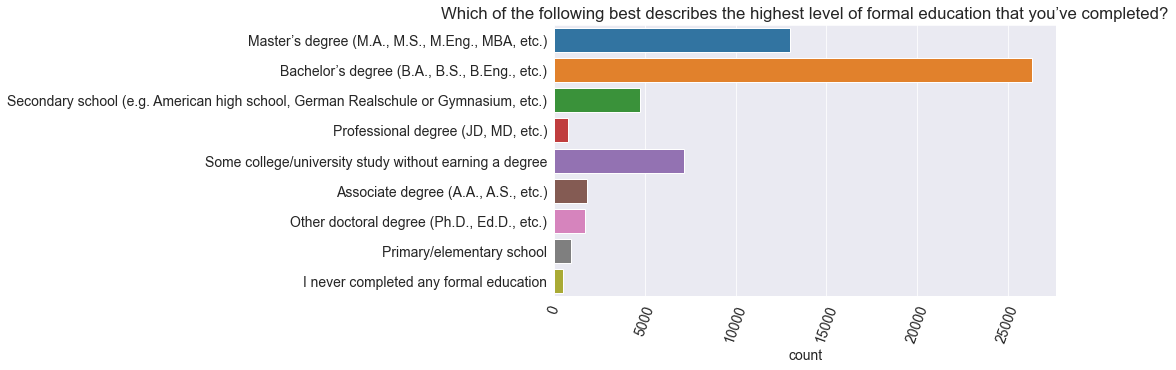

In [74]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation = 70)
plt.title(schema_df.EdLevel)
plt.ylabel(None);

In [78]:
sns.countplot??

In [76]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'Age_group'],
      dtype='object')

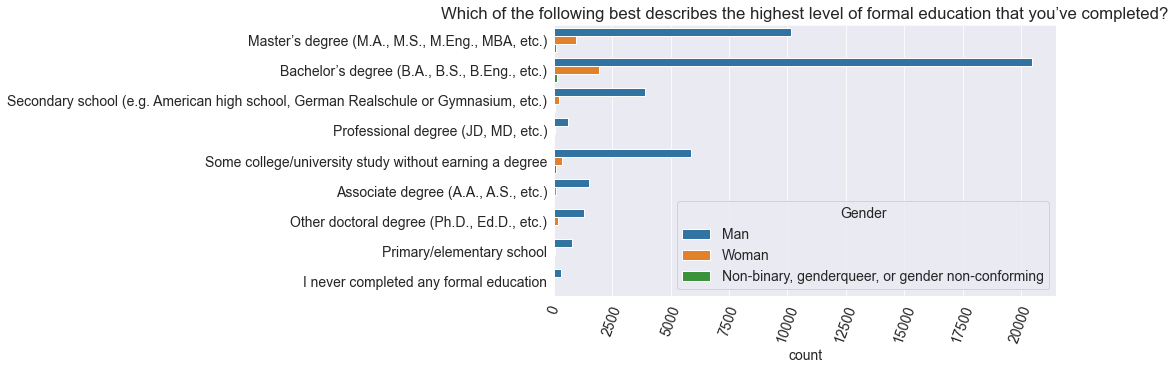

In [77]:
sns.countplot(y=survey_df.EdLevel, hue=survey_df.Gender)
plt.xticks(rotation = 70)
plt.title(schema_df.EdLevel)
plt.ylabel(None);

In [88]:
Edlevel_perce = round((survey_df.EdLevel.value_counts() / survey_df.EdLevel.value_counts().sum()) * 100)
Edlevel_perce

Index(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', 'Professional degree (JD, MD, etc.)',
       'I never completed any formal education'],
      dtype='object')

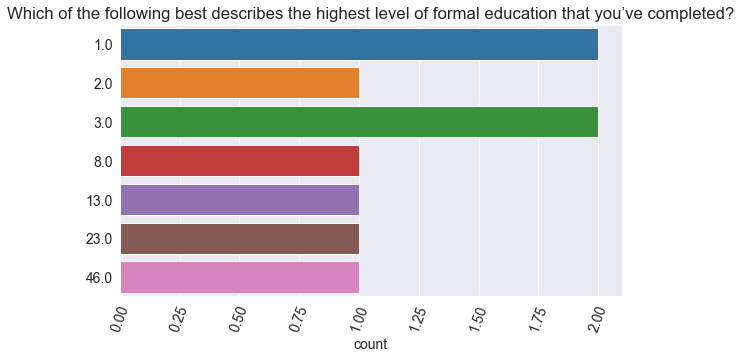

In [89]:
sns.countplot(y=Edlevel_perce)
plt.xticks(rotation=70)
plt.title(schema_df.EdLevel)
plt.ylabel(None);

In [90]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'Age_group'],
      dtype='object')

In [91]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object